In [1]:
import pandas as pd
from pathlib import Path
import os
from maad import util

# Directory where to download the audio files from Xeno-canto
XC_ROOTDIR = './data/'
# Name of the dataset
XC_DIR = 'bird_dataset'

# Define the woodpecker species data names by common name and scientific Genus-Species name 
data = [
    ['Yellow Warbler', 'Setophaga aestiva'],
    ['Yellow-rumped Warbler', 'Setophaga coronata'],
    ['Common Yellowthroat', 'Geothlypis trichas'],
    ['Magnolia Warbler', 'Setophaga magnolia'],
    ['American Redstart', 'Setophaga ruticilla'],
    ['Hooded Warbler', 'Setophaga citrina'],
    ['Black-throated Blue Warbler', 'Setophaga caerulescens'],
    ['Chestnut-sided Warbler', 'Setophaga pensylvanica'],
    ['Yellow-throated Warbler', 'Setophaga dominica'],
    ['Black-throated Green Warbler', 'Setophaga virens'],
    ['Black-and-white Warbler', 'Mniotilta varia'],
    ['Prairie Warbler', 'Setophaga discolor'],
    ['Cerulean Warbler', 'Setophaga cerulea'],
    ['Blackburnian Warbler', 'Setophaga fusca'],
    ['Pine Warbler', 'Setophaga pinus'],
    ['Ovenbird', 'Seiurus aurocapilla'],
    ['Cape May Warbler', 'Setophaga tigrina'],
    ['Blue-winged Warbler', 'Vermivora cyanoptera'],
    ['Golden-winged Warbler', 'Vermivora chrysoptera'],
    ['Prothonotary Warbler', 'Protonotaria citrea']
]

# Create a DataFrame with the species information
df_species = pd.DataFrame(data, columns=['english name', 'scientific name'])

# Separate genus and species for Xeno-canto query
gen, sp = [], []
for name in df_species['scientific name']:
    gen.append(name.split()[0])
    sp.append(name.split()[1])

# Build the query dataframe
df_query = pd.DataFrame()
df_query['param1'] = gen
df_query['param2'] = sp
df_query['param3'] = 'type:song'    # Target only songs not calls

# Query Xeno-canto for recordings
df_dataset = util.xc_multi_query(df_query, format_time=False, format_date=False, verbose=True)

# Select files with specific conditions
df_dataset = util.xc_selection(df_dataset, 
                               max_nb_files=50,   # Up to 50 recordings per species
                               max_length='04:00',
                               min_length='00:30',
                               min_quality='C',   # Minimum quality
                               verbose=True)

# Download audio files into a subdirectory for each species
util.xc_download(df_dataset, 
                 rootdir=XC_ROOTDIR, 
                 dataset_name=XC_DIR, 
                 overwrite=False, 
                 save_csv=True, 
                 verbose=True)

# Grab all downloaded audio filenames in the directory and create a dataframe
filelist = []
for root, dirs, files in os.walk(os.path.join(XC_ROOTDIR, XC_DIR)):
    for name in files:
        if name.endswith('.mp3'):
            filelist.append(os.path.join(root, name))

df_files = pd.DataFrame(filelist, columns=['fullfilename'])
df_files['filename'] = df_files['fullfilename'].apply(lambda x: Path(x).stem)
df_files['species'] = df_files['fullfilename'].apply(lambda x: Path(x).parts[-2])

print('=====================================================')
print(f'Number of files: {len(df_files)}')
print(f'Number of species: {len(df_files.species.unique())}')
print('=====================================================')


Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Setophaga%20aestiva%20type:song&page=1
Found 1 pages in total.
Saved metadata for 447 files
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Setophaga%20coronata%20type:song&page=1
Found 1 pages in total.
Saved metadata for 210 files
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Geothlypis%20trichas%20type:song&page=1
Found 1 pages in total.
Saved metadata for 469 files
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Setophaga%20magnolia%20type:song&page=1
Found 1 pages in total.
Saved metadata for 224 files
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Setophaga%20ruticilla%20type:song&page=1
Found 1 pages in total.
Saved metadata for 360 files
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Setophaga%20citrina%20type:song&page=1
Found 1 pages in total.
Saved metadata for 244 files
Loading page 1...
https://www.xeno-

/opt/anaconda3/lib/python3.12/site-packages/maad/util/xeno_canto.py:462: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([pd.read_csv(filename_csv,sep=';',index_col='id'),


Saving file  666 / 1000 : https://xeno-canto.org/415436/download
Saving file  667 / 1000 : https://xeno-canto.org/690973/download
Saving file  668 / 1000 : https://xeno-canto.org/31180/download
Saving file  669 / 1000 : https://xeno-canto.org/690975/download
Saving file  670 / 1000 : https://xeno-canto.org/317904/download
Saving file  671 / 1000 : https://xeno-canto.org/428342/download
Saving file  672 / 1000 : https://xeno-canto.org/101581/download
Saving file  673 / 1000 : https://xeno-canto.org/78807/download
Saving file  674 / 1000 : https://xeno-canto.org/690974/download
Saving file  675 / 1000 : https://xeno-canto.org/13765/download
Saving file  676 / 1000 : https://xeno-canto.org/13766/download
Saving file  677 / 1000 : https://xeno-canto.org/468080/download
Saving file  678 / 1000 : https://xeno-canto.org/844266/download
Saving file  679 / 1000 : https://xeno-canto.org/600306/download
Saving file  680 / 1000 : https://xeno-canto.org/106949/download
Saving file  681 / 1000 : htt

/opt/anaconda3/lib/python3.12/site-packages/maad/util/xeno_canto.py:462: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([pd.read_csv(filename_csv,sep=';',index_col='id'),


Saving file  704 / 1000 : https://xeno-canto.org/210725/download
Saving file  705 / 1000 : https://xeno-canto.org/691773/download
Saving file  706 / 1000 : https://xeno-canto.org/638307/download
Saving file  707 / 1000 : https://xeno-canto.org/451655/download
Saving file  708 / 1000 : https://xeno-canto.org/144093/download
Saving file  709 / 1000 : https://xeno-canto.org/828049/download
Saving file  710 / 1000 : https://xeno-canto.org/782138/download
Saving file  711 / 1000 : https://xeno-canto.org/418566/download
Saving file  712 / 1000 : https://xeno-canto.org/691778/download
Saving file  713 / 1000 : https://xeno-canto.org/933613/download
Saving file  714 / 1000 : https://xeno-canto.org/602056/download
Saving file  715 / 1000 : https://xeno-canto.org/691779/download
Saving file  716 / 1000 : https://xeno-canto.org/638308/download
Saving file  717 / 1000 : https://xeno-canto.org/553224/download
Saving file  718 / 1000 : https://xeno-canto.org/638319/download
Saving file  719 / 1000 :

/opt/anaconda3/lib/python3.12/site-packages/maad/util/xeno_canto.py:462: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([pd.read_csv(filename_csv,sep=';',index_col='id'),


Saving file  991 / 1000 : https://xeno-canto.org/313279/download
Saving file  992 / 1000 : https://xeno-canto.org/315743/download
Saving file  993 / 1000 : https://xeno-canto.org/568578/download
Saving file  994 / 1000 : https://xeno-canto.org/662929/download
Saving file  995 / 1000 : https://xeno-canto.org/247257/download
Saving file  996 / 1000 : https://xeno-canto.org/388722/download
Saving file  997 / 1000 : https://xeno-canto.org/31112/download
Saving file  998 / 1000 : https://xeno-canto.org/552556/download
Saving file  999 / 1000 : https://xeno-canto.org/891550/download
Saving file  1000 / 1000 : https://xeno-canto.org/891549/download
Number of files: 1000
Number of species: 20


In [11]:
df_files.head()

,fullfilename,filename,species,length


In [6]:
df_files_copy = df_files
df_files_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fullfilename  1000 non-null   object
 1   filename      1000 non-null   object
 2   species       1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [13]:
df_files_copy.head()

,fullfilename,filename,species,length
0,./data/bird_dataset/Setophaga magnolia_Magnoli...,XC173703,Setophaga magnolia_Magnolia Warbler,None
1,./data/bird_dataset/Setophaga magnolia_Magnoli...,XC729497,Setophaga magnolia_Magnolia Warbler,None
2,./data/bird_dataset/Setophaga magnolia_Magnoli...,XC694664,Setophaga magnolia_Magnolia Warbler,None
3,./data/bird_dataset/Setophaga magnolia_Magnoli...,XC828025,Setophaga magnolia_Magnolia Warbler,None
4,./data/bird_dataset/Setophaga magnolia_Magnoli...,XC134515,Setophaga magnolia_Magnolia Warbler,None


In [14]:
import os

# Check if the file in the first row exists
first_file_path = df_files_copy['fullfilename'].iloc[0]

if os.path.exists(first_file_path):
    print(f"File exists: {first_file_path}")
else:
    print(f"File does not exist: {first_file_path}")


File exists: ./data/bird_dataset/Setophaga magnolia_Magnolia Warbler/XC173703.mp3


In [16]:
from pydub import AudioSegment
import os

# Set FFmpeg path
AudioSegment.converter = "/opt/homebrew/bin/ffmpeg"

# Function to calculate length of the song
def get_song_length(file_path):
    try:
        audio = AudioSegment.from_file(file_path)
        length = len(audio) / 1000  # Convert milliseconds to seconds
        print(f"Song length: {length} seconds.")
        return length
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Test the function on the first file
first_file_path = df_files_copy['fullfilename'].iloc[0]
get_song_length(first_file_path)

Song length: 69.456 seconds.


69.456

In [18]:
from pydub import AudioSegment
import pandas as pd
import matplotlib.pyplot as plt

# Set FFmpeg path
AudioSegment.converter = "/opt/homebrew/bin/ffmpeg"

# Function to calculate length of the song
def get_song_length(file_path):
    try:
        audio = AudioSegment.from_file(file_path)
        print(f"Song length: {len(audio) / 1000} seconds.")
        return len(audio) / 1000  # Convert milliseconds to seconds
    except:
        print("Error loading file")
        return None  # In case of error, return None

# Apply function to add a 'length' column in seconds
df_files_copy['length'] = df_files_copy['fullfilename'].apply(get_song_length)

# Drop any rows with None values in the 'length' column (if any errors occurred)
# df_files_copy = df_files_copy.dropna(subset=['length'])


Song length: 69.456 seconds.
Song length: 58.865 seconds.
Song length: 84.394 seconds.
Song length: 90.264 seconds.
Song length: 59.402 seconds.
Song length: 98.194 seconds.
Song length: 64.052 seconds.
Song length: 175.296 seconds.
Song length: 175.656 seconds.
Song length: 83.928 seconds.
Song length: 142.272 seconds.
Song length: 95.232 seconds.
Song length: 54.282 seconds.
Song length: 91.011 seconds.
Song length: 113.4 seconds.
Song length: 57.005 seconds.
Song length: 56.999 seconds.
Song length: 65.332 seconds.
Song length: 58.436 seconds.
Song length: 108.185 seconds.
Song length: 62.257 seconds.
Song length: 56.574 seconds.
Song length: 104.411 seconds.
Song length: 82.521 seconds.
Song length: 74.626 seconds.
Song length: 73.77 seconds.
Song length: 139.425 seconds.
Song length: 201.247 seconds.
Song length: 122.863 seconds.
Song length: 114.92 seconds.
Song length: 74.169 seconds.
Song length: 64.2 seconds.
Song length: 95.544 seconds.
Song length: 78.994 seconds.
Song lengt

In [20]:
# Extract the common name by splitting at the underscore and taking the second part
df_files_copy['Common Name'] = df_files_copy['species'].apply(lambda x: x.split('_')[1])

# Display the updated dataframe to verify
df_files_copy.head()


,fullfilename,filename,species,length,Common Name
0,./data/bird_dataset/Setophaga magnolia_Magnoli...,XC173703,Setophaga magnolia_Magnolia Warbler,69.456,Magnolia Warbler
1,./data/bird_dataset/Setophaga magnolia_Magnoli...,XC729497,Setophaga magnolia_Magnolia Warbler,58.865,Magnolia Warbler
2,./data/bird_dataset/Setophaga magnolia_Magnoli...,XC694664,Setophaga magnolia_Magnolia Warbler,84.394,Magnolia Warbler
3,./data/bird_dataset/Setophaga magnolia_Magnoli...,XC828025,Setophaga magnolia_Magnolia Warbler,90.264,Magnolia Warbler
4,./data/bird_dataset/Setophaga magnolia_Magnoli...,XC134515,Setophaga magnolia_Magnolia Warbler,59.402,Magnolia Warbler


In [21]:
df_files_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fullfilename  1000 non-null   object 
 1   filename      1000 non-null   object 
 2   species       1000 non-null   object 
 3   length        1000 non-null   float64
 4   Common Name   1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [24]:
# Per-species average length
species_avg = df_files_copy.groupby('Common Name')['length'].mean()

# Overall average length
overall_avg = df_files_copy['length'].mean()

# Find the longest and shortest individual song lengths
longest_song = df_files_copy.loc[df_files_copy['length'].idxmax()]
shortest_song = df_files_copy.loc[df_files_copy['length'].idxmin()]

# Print the results
print("Per-species average song length:\n", species_avg)
print("\nOverall average song length:", overall_avg)

print("\nLongest individual song:")
print(f"Species: {longest_song['species']}")
print(f"Common Name: {longest_song['Common Name']}")
print(f"File: {longest_song['fullfilename']}")
print(f"Length: {longest_song['length']} seconds")

print("\nShortest individual song:")
print(f"Species: {shortest_song['species']}")
print(f"Common Name: {shortest_song['Common Name']}")
print(f"File: {shortest_song['fullfilename']}")
print(f"Length: {shortest_song['length']} seconds")


Per-species average song length:
 Common Name
American Redstart               120.91426
American Yellow Warbler         101.09340
Black-and-white Warbler          75.56098
Black-throated Blue Warbler      97.70198
Black-throated Green Warbler     78.71468
Blackburnian Warbler             94.87520
Blue-winged Warbler              95.36714
Cape May Warbler                 80.69556
Cerulean Warbler                 78.22432
Chestnut-sided Warbler           99.33422
Common Yellowthroat             129.52114
Golden-winged Warbler            70.32302
Hooded Warbler                   81.43078
Magnolia Warbler                 95.78890
Myrtle Warbler                   77.64772
Ovenbird                        132.44888
Pine Warbler                     80.39978
Prairie Warbler                  88.24186
Prothonotary Warbler             85.23632
Yellow-throated Warbler          76.00394
Name: length, dtype: float64

Overall average song length: 91.976204

Longest individual song:
Species: Geothlypis

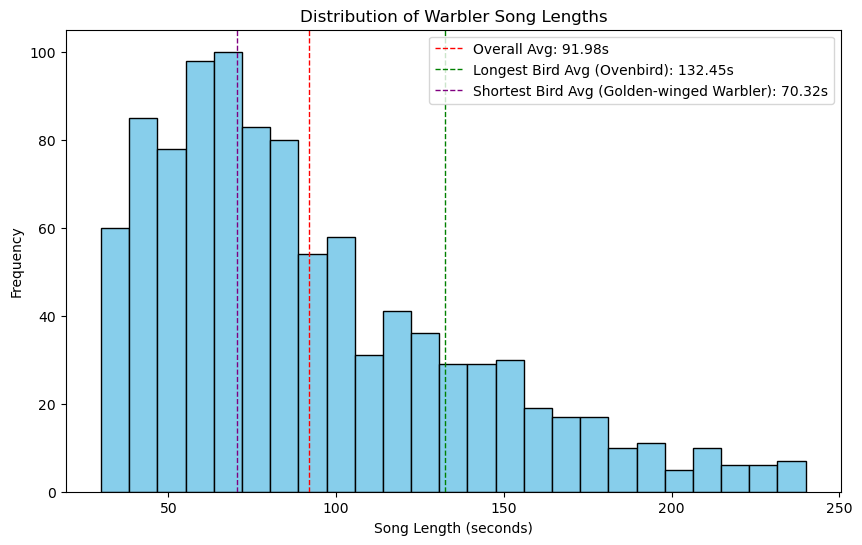

In [30]:
# Find the longest and shortest average lengths
longest_avg_species = species_avg.idxmax()
shortest_avg_species = species_avg.idxmin()

longest_avg = species_avg.max()
shortest_avg = species_avg.min()

# Plot histogram with additional lines
plt.figure(figsize=(10, 6))
plt.hist(df_files_copy['length'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel("Song Length (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Warbler Song Lengths")

# Add lines for overall, longest, and shortest averages
plt.axvline(overall_avg, color='red', linestyle='dashed', linewidth=1, label=f'Overall Avg: {overall_avg:.2f}s')
plt.axvline(longest_avg, color='green', linestyle='dashed', linewidth=1, label=f'Longest Bird Avg ({longest_avg_species}): {longest_avg:.2f}s')
plt.axvline(shortest_avg, color='purple', linestyle='dashed', linewidth=1, label=f'Shortest Bird Avg ({shortest_avg_species}): {shortest_avg:.2f}s')

plt.legend()
plt.show()


In [31]:
# Total length of all calls in seconds
total_length_seconds = df_files_copy['length'].sum()

# Convert to minutes and hours
total_length_minutes = total_length_seconds / 60
total_length_hours = total_length_minutes / 60

# Print the results
print(f"Total length of all calls combined: {total_length_seconds} seconds")
print(f"Total length of all calls combined: {total_length_minutes} minutes")
print(f"Total length of all calls combined: {total_length_hours} hours")


Total length of all calls combined: 91976.204 seconds
Total length of all calls combined: 1532.9367333333332 minutes
Total length of all calls combined: 25.548945555555555 hours
